<a href="https://colab.research.google.com/github/leeds1219/DL_and_AI_Notes_and_Projects/blob/main/DiveintoDeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Preliminaries

# 2.1. Data Manipulation

In [ ]:
#2.1.1 Getting Started

import torch

# A tensor is an array of numerical values.

x = torch.arange(12, dtype=torch.float32)
x

# arange(n) create a vector of evenly spaced values starting at 0
# and ending at n(not included)
# each values of x is called element of tensor

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [ ]:
# number of elements
x.numel()

12

In [ ]:
# shape of tensor(the length along each axis)
x.shape

torch.Size([12])

In [ ]:
# changing the shape of a tensor
X = x.reshape(3, 4)
X

# note that reshape is redundant x.reshape(3,4) is equivalent to x.reshape(-1,4)
# or x.reshape(3,-1)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
# zero tensor
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
# one tensor
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [ ]:
# random (tensor with elements drawn from Gaussian distribution)
torch.randn(3,4)

tensor([[-0.2245, -1.0946,  0.3518,  1.1990],
        [-0.0396,  0.5453, -1.1508, -0.1254],
        [ 0.0345, -0.4640, -0.7160,  1.5059]])

In [ ]:
# directly setting the elements
torch.tensor([[2,1,4,3],[1,2,3,4],[4,3,2,1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

In [ ]:
# 2.1.2. Indexing and Slicing

# X[start:stop] X[-1] means last row, X[1:3] means second and third row
# remember that index starts from 0 in Python

X[-1], X[1:3]

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [ ]:
# writing elements of a matrix by specifying indices

X[1,2] = 17
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [ ]:
# assigning multiple elements of the same value

X[:2, :] = 12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

In [ ]:
# 2.1.3. Operations

# elementwise operations are useful
# exp(x) operates e^(x) elementwise

torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [ ]:
# addition + subtraction - multiplication *
# division / exponentiation ** operators

x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y

In [ ]:
# linear algebraic operations
# dot products & matrix multiplications <- in section 2.3

# concatenate multiple tensors stacking tem end to end and
# example that concatenate two matrices along rows instead of columns

X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

In [ ]:
# binary tensor via logical statements

# For each position i, j, if X[i, j] and Y[i, j] are equal, then the
# corresponding entry in the result takes value 1, otherwise it takes value 0.

X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [ ]:
# sum

X.sum()

tensor(66.)

In [ ]:
# 2.1.4 Broadcasting # very important concept!!

# for two tensors that differ in shape

# Broadcasting works according to the following two-step procedure:
# (i) expand one or both arrays by copying elements along axes with length 1
# so that after this transformation, the two tensors have the same shape;
# (ii) perform an elementwise operation on the resulting arrays.

a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [ ]:
# Since a and b are 3 by 1 and 1 by 2 matrices,
# respectively, their shapes do not match up.

# Broadcasting produces a larger 3 by 2 matrix by replicating matrix a along
# the columns and matrix b along the rows before adding them elementwise!!

a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [ ]:
# 2.1.5. Saving Memory

# Python's id() function give us the exact address of the referenced object in memory
# running operations can cause new memory to be allocated to host results

before = id(Y)
Y = Y + X
id(Y) == before

# memory allocation problem

False

In [ ]:
# in-place operation

# we initialize by overwriting the result to the previously allocated array Y
# with zeros_like we match the shape of Z to Y

Z = torch.zeros_like(Y)
print('id(Z):', id(Z))
Z[:] = X + Y
print('id(Z):', id(Z))

id(Z): 133329273792096
id(Z): 133329273792096


In [ ]:
# if X is not reused ?
# we can use X +=Y or X[:] = X + Y to reduce the memory overhead

before = id(X)
X += Y
id(X) == before

True

In [ ]:
# 2.1.6. Converstion to Other Python Objects

# Convertin to a NumPy tensor (ndarray) or vice versa

A = X.numpy()
B = torch.from_numpy(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

In [ ]:
# 2.1.7. Summary

In [ ]:
# 2.1.8. Exercises

# 2.2 Data Preprocessing

In [ ]:
# 2.2.1. Reading the Dataset

# Comma-separated values (CSV) files are ubiquitous
# lets create a CSV file

import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
  f.write('''NumRooms,RoofTyp,Price
 NA,NA,127500
 2,NA,106000
 4,Slate,17800
 NA,NA,140000''')

In [ ]:
# importing pandas and load the dataset with read_csv

import pandas as pd

data = pd.read_csv(data_file)
print(data)

  NumRooms RoofTyp   Price
0       NA     NaN  127500
1        2     NaN  106000
2        4   Slate   17800
3       NA     NaN  140000


In [ ]:
# 2.2.2. Data Preparation

# In supervised learning, we train models to predict a target
# with given some set of input

# we need to separate out the columns to input versus taret
# we can select columns either by name or via integer-location based indexing(iloc)

# pandas replaced all NA with NaN(not a number)
# this can also happen whnever an entry is empthy
# these missing calues are always the problem
# depending upon the context we might handle them via imputation(estimation) or deletion

# common imputation heuristics (heristics <- review AI lecture)
# for categorical input fields, we can treat NaN as a category
# RoofType column takes values Slate and NaN, pandas can convert this into
# two columns RoofType_Slate and RoofType_nan
# a row whose roof type is Slate will set values of RoofType_Slate and RoofType_nan
# to 1 and 0
# this is done by get_dummies <-

inputs, targets = data.iloc[:, 0:2], data.iloc[:,2]
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms_ 2  NumRooms_ 4  NumRooms_ NA  NumRooms_nan  RoofTyp_Slate  \
0            0            0             1             0              0   
1            1            0             0             0              0   
2            0            1             0             0              1   
3            0            0             1             0              0   

   RoofTyp_nan  
0            1  
1            1  
2            0  
3            1  


In [ ]:
# for missing numerical values
# one common heuristic is to replace the NaN with mean value

inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms_ 2  NumRooms_ 4  NumRooms_ NA  NumRooms_nan  RoofTyp_Slate  \
0            0            0             1             0              0   
1            1            0             0             0              0   
2            0            1             0             0              1   
3            0            0             1             0              0   

   RoofTyp_nan  
0            1  
1            1  
2            0  
3            1  


There was a bit difference in 2.2.2. section compared to the output compared to the original d2l

In [ ]:
# 2.2.3. Converstion to the Tensor Format

import torch

X = torch.tensor(inputs.to_numpy(dtype=float))
y = torch.tensor(targets.to_numpy(dtype=float))
X, y

(tensor([[0., 0., 1., 0., 0., 1.],
         [1., 0., 0., 0., 0., 1.],
         [0., 1., 0., 0., 1., 0.],
         [0., 0., 1., 0., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000.,  17800., 140000.], dtype=torch.float64))

In [ ]:
# 2.2.4. Discussion

In [ ]:
# 2.2.5. Exercises

# 2.3 Linear Algebra

In [ ]:
import torch

In [ ]:
# 2.3.1. Scalars

# scalars are implemented as a tensor with a single element
x = torch.tensor(3.0)
y = torch.tensor(2.0)

x+y, x*y, x/y, x**y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.))

In [ ]:
# Vectors

# vectors are implemented as 1st-order tensors
# Caution!! linear algebra starts at 1 but Python is a zero-based indexing language

x = torch.arange(3)
x

tensor([0, 1, 2])

In [ ]:
# accessing atensor via indexing

x[2]

tensor(2)

In [ ]:
# dimensionality of the vector

len(x)

3

In [ ]:
# accessing the length via shape

# shape is a tuple that indicates a tensor's length along each axis

# order = # of axis, dimensionality = # of components

x.shape

In [ ]:
# 2.3.3. matrices

A = torch.arange(6).reshape(3, 2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [ ]:
# Transpose

A.T

tensor([[0, 2, 4],
        [1, 3, 5]])

In [ ]:
# Symmetric matrices

A = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]])
A == A.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [ ]:
# 2.3.4. tensors

# image -> height, width, and channel

torch.arange(24).reshape(2,3,4)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

In [ ]:
# 2.3.5. Basic Properties of Tensor Arithmetic

A = torch.arange(6, dtype=torch.float32).reshape(2, 3)
B = A.clone()  # Assign a copy of A to B by allocating new memory
A, A + B

(tensor([[0., 1., 2.],
         [3., 4., 5.]]),
 tensor([[ 0.,  2.,  4.],
         [ 6.,  8., 10.]]))

In [ ]:
# Hadamard product
# elementwise product of two matrices

A * B

tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])

In [ ]:
# Adding or multiplying a tensor
# produces the same shape as the original

a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [ ]:
# 2.3.6. Reduction

# the sum of tensor's elements
x = torch.arange(3, dtype=torch.float32)
x, x.sum()

(tensor([0., 1., 2.]), tensor(3.))

In [ ]:
# for arbitrary shape

A.shape, A.sum()

(torch.Size([2, 3]), tensor(15.))

In [ ]:
# By default invoking the sum function reduces a tensor along all of its axes
# producing a scalar

A.shape, A.sum(axis=1).shape

(torch.Size([2, 3]), torch.Size([2]))

In [ ]:
# reducing a matrix along both rows and columns via summation is equivalent

A.sum(axis=[0,1]) == A.sum()

tensor(True)

In [ ]:
# mean (average)

A.mean(), A.sum()/A.numel()

(tensor(2.5000), tensor(2.5000))

In [ ]:
# mean function can also reduce a tensor along specific axes

A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([1.5000, 2.5000, 3.5000]), tensor([1.5000, 2.5000, 3.5000]))

In [ ]:
# 2.3.7. Non-Reduction Sum

# Leaving the axes unchanged, used when broadcasting mechanism are needed
sum_A = A.sum(axis=1, keepdims=True)
sum_A, sum_A.shape

In [ ]:
A / sum_A

In [ ]:
# calculate the cumulative sum of elements of A along some axis
# does not reduce the any axis of the tensor

A.cumsum(axis=0)

In [ ]:
# 2.3.8. Dot Product

y = torch.ones(3, dtype = torch.float32)
x, y, torch.dot(x, y)

In [ ]:
torch.sum(x * y)

In [ ]:
# 2.3.9. Matrix-Vector Products

# mv function
# Note that the column dimension of A (its length along axis 1)
# must be the same as the dimension of x (its length)

# Python has a convenience operator @ that can execute both matrix–vector and
# matrix–matrix products (depending on its arguments)

A.shape, x.shape, torch.mv(A, x), A@x

In [ ]:
# 2.3.10. Matrix-Matrix Multiplication

# The term matrix–matrix multiplication is often simplified to
# matrix multiplication, and should not be confused with the Hadamard product

B = torch.ones(3, 4)
torch.mm(A, B), A@B

In [ ]:
# 2.3.11. Norms

# The method norm calculates the l2 norm

u = torch.tensor([3.0, -4.0])
torch.norm(u)

In [ ]:
# l1 norms

torch.abs(u).sum()

In [ ]:
# The Frobenius norm

# These distances, which constitute the objectives of deep learning algorithms
# are often expressed as norms

torch.norm(torch.ones((4, 9)))

In [ ]:
# 2.3.12. Discussions

In [ ]:
# 2.3.13. Exercises

# 2.4. Calculus(X)

In [ ]:
# 2.4.1. Derivatives and Differentiation

# d2l in colab
!pip install d2l==1.0.3

%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [ ]:
def f(x):
    return 3 * x ** 2 - 4 * x

In [ ]:
for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')

In [ ]:
# 2.4.2 Visualization Utilites

#def use_svg_display():  #@save
#    """Use the svg format to display a plot in Jupyter."""
#    backend_inline.set_matplotlib_formats('svg')

#def set_figsize(figsize=(3.5, 2.5)):  #@save
#   """Set the figure size for matplotlib."""
#    use_svg_display()
#    d2l.plt.rcParams['figure.figsize'] = figsize

# #@save
#def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
#    """Set the axes for matplotlib."""
#    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
#    axes.set_xscale(xscale), axes.set_yscale(yscale)
#    axes.set_xlim(xlim),     axes.set_ylim(ylim)
#    if legend:
#        axes.legend(legend)
#    axes.grid()

# #@save
#def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
#         ylim=None, xscale='linear', yscale='linear',
#         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
#    """Plot data points."""

#    def has_one_axis(X):  # True if X (tensor or list) has 1 axis
#        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
#                and not hasattr(X[0], "__len__"))

#    if has_one_axis(X): X = [X]
#    if Y is None:
#        X, Y = [[]] * len(X), X
#    elif has_one_axis(Y):
#        Y = [Y]
#    if len(X) != len(Y):
#        X = X * len(Y)

#    set_figsize(figsize)
#    if axes is None:
#        axes = d2l.plt.gca()
#    axes.cla()
#    for x, y, fmt in zip(X, Y, fmts):
#        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
#    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

# these are in d2l

In [ ]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [ ]:
# 2.4.3. Partial Derivatives and Gradients(txt only)

In [ ]:
# 2.4.4. Chain Rule(txt only)

In [ ]:
# 2.4.5. Disscusion

In [ ]:
# 2.4.6. Exercises

# 2.5. Automatic Differentiation

In [ ]:
# 2.5.1. A Simple Function

import torch

# lets assume y = 2*x.T*x
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

In [ ]:
# Before we calculate the gradien of y
# we need a place to store it

# we avoid allocating new momory every time we take a derivative
# note that the gradient of a scalar-valuded function has the same shape as x

# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad  # The gradient is None by default

In [ ]:
# calculated our function of x and assign the result to y

y = 2 * torch.dot(x, x)
y

In [ ]:
# take the gradient of y respect to x by backward method
# we can access the gradient via x's grad attribute

y.backward()
x.grad

In [ ]:
# from the function we know that gradient is 4*x
# varification

x.grad == 4*x

In [ ]:
# another function of x?
# PyTorch does not automatically reset the gradien buffer
# new gradient is added to the already-stored gradient
# this can be handy but we can reset it by

x.grad.zero_()  # Reset the gradient
y = x.sum()
y.backward()
x.grad

In [ ]:
# 2.5.2 Backward for Non-Scalar Variables
# Jacobian!!! <- important!!!
# Jacobian is a matrix that contains the partial derivatives of
# each component of y respect to each component of x

# PyTorch takes some steps to avoid confusion
# Invoking backward on a non-scalar elicits an error unless
# we tell PyTorch how to reduce the object to a scalar

x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y)))  # Faster: y.sum().backward()
x.grad

In [ ]:
# 2.5.3. Detaching Computation
# example : z = x*y, y = x*x we want x on z without y
# we need to detach the respective computational graph from the final result
# In this case, we can create a new variable u that takes
# the same value as y but whose provenance (how it was created)
# has been wiped out (z = x*u will yield u, not 3*x*x = a derivative of x^3)
# Thus u has no ancestors in the graph and gradients do not
# flow through u to x

x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

In [ ]:
# Note that while this procedure detaches y’s ancestors from
# the graph leading to z, the computational graph leading to y persists
# and thus we can calculate the gradient of y with respect to x

x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

In [ ]:
# 2.5.4. Gradients and Python Control Flow

# Programming offers us a lot more freedom in how we compute results.
# For instance, we can make them depend on auxiliary variables or
# condition choices on intermediate results.
# One benefit of using automatic differentiation is that even if
# building the computational graph of a function required passing through
# a maze of Python control flow(e.g.,conditionals,loops,and arbitrary function calls)
# we can still calculate the gradient of the resulting variable

# iteration of the while loop and the evaluation of if statement both
# depend on input a

def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [ ]:
# since the input is a random variable, we do not know what form
# the computational graph will take
# however, a specific computational graph and can subsequently run backward!!
# whenever we execute f(a) on a specific input!!

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [ ]:
# f is a linear function
# f(a)/z needs to match the gradient of f(a) respect to a

a.grad == d / a

In [ ]:
# 2.5.5. Discussion

In [ ]:
# 2.5.6. Exercises

# 2.6. Probability and Statistics(X)

In [ ]:
# d2l in colab
!pip install d2l==1.0.3

In [ ]:
%matplotlib inline
import random
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [ ]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(num_tosses)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

In [ ]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample()

In [ ]:
counts = Multinomial(1, fair_probs).sample((10000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()

d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

# 2.7. Documentation(X)

In [ ]:
import torch

In [ ]:
# 2.7.1. Functions and Classes in a Module

print(dir(torch.distributions))

In [ ]:
# 2.7.2. Specific Functions and Classes

help(torch.ones)

In [ ]:
# Whenever possible, you should run a quick test to confirm your interpretation
torch.ones(4)

# 3. Linear Neural Networks for Regression

# 3.1. Linear Regression

In [ ]:
# d2l in colab
!pip install d2l==1.0.3

In [ ]:
%matplotlib inline
import math
import time
import numpy as np
import torch
from d2l import torch as d2l

In [ ]:
# 3.1.1.1. Model(txt only)

# 3.1.1.2. Loss Function(txt only)

# 3.1.1.3. Analytic Solution(txt only)

# 3.1.1.4.  Minibatch Stochastic Gradien Descent(txt only)

# 3.1.1.5. Predictions(txt only)


In [ ]:
# 3.1.2. Vectorization for speed

# 10000 dimensional vector all 1s

n = 10000
a = torch.ones(n)
b = torch.ones(n)

In [ ]:
# benchmark the workloads add them one coordinate at a time using a for-loop

c = torch.zeros(n)
t = time.time()
for i in range(n):
  c[i] = a[i] + b[i]
f'{time.time()- t:.5f}sec'

'0.11332sec'

In [ ]:
# alternatively, rely on reloaded + operator to compute the elementwise sum

t = time.time()
d = a + b
f'{time.time() - t:.5f}sec'

'0.00115sec'

The second method is dramatically faster!!
vertorization of the code speedsup!

In [ ]:
# 3.1.3. The Normal Distribution and Squared Loss

# a function to compute the Gaussian normal distribution
def normal(x, mu, sigma):
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 * (x - mu)**2 / sigma**2)

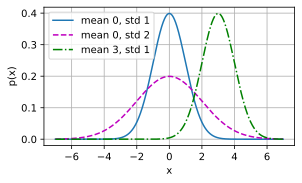

In [ ]:
# visualizing the normal distributions

# use Numpy again
x = np.arange(-7,7,0.01)

# mean and s.d. pairs parameters for G
params = [(0,1),(0,2),(3,1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])

In [ ]:
# 3.1.4. Linear Regression as a Neural Network

# 3.1.4.1. Biology

In [ ]:
# 3.1.5. Summary

In [ ]:
# 3.1.6. Exercises

# 3.2. Object-Oriented Design for Implementation

In [ ]:
# d2l in colab
!pip install d2l==1.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.3
    Uninstalling scipy-1.11.3:
      Successfully uninstalled scipy-1.11.3
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      S

In [ ]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l

In [ ]:
# 3.2.1. Utilities

# The first utility function allows us to register functions as
# methods in a class after the class has been created
# In fact, we can do so even after we have created instances of the class!
# It allows us to split the implementation of a class into multiple code blocks

def add_to_class(Class):
    """Register functions as methods in created class."""
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [ ]:
# how to use the first utility function
# We plan to implement a class A with a method do
# Instead of having code for both A and do in the same code block,
# we can first declare the class A and create an instance a

class A:
    def __init__(self):
        self.b = 1

a = A()

In [ ]:
# we define the method do as we normally sould not in class A's scope
# decorate this method by add_to_class with class A as its argument
# this can able the method to access the member variables of A

@add_to_class(A)
def do(self):
  print('Class attribute "b" is', self.b)

a.do()

NameError: ignored

In [ ]:
# second one is a utility class that saves all arguments in a class's __init__ method as
# class attributes
# this allows us to extend constructor call signatures implicitly without additional code

class HyperParameters:
  """the bas class of hypeparameters."""
  def save_hyperparameters(self, ignore=[])
    raise NotImplemented

In [ ]:
# To use it, we define our class that ingerits from HyperParameters and calls
# save_hyperparameters in the __init__ method

class B(d2l.HyperParameters):
  def __init__(self,a,b,c):
    self.save_hyperparameters(ignore=['c'])
    print('self.a =', self.a, 'self.b =', self.b)
    print('There is no self.c =', not hasattr(self, 'c'))

b = B(a=1, b=2, c=3)

In [ ]:
# The final utility allows us to plot experiment progress interactively while it is going on
# ProgressBoard
# the draw method plots a point(x, y) in figure, with label specified in the legen
# the optional ever_n smooths the line by only showing 1/n points in the figure
# their values are averaged from the n neighbor points in the original figure

class ProgressBoard(d2l.HyperParameters):
    """The board that plots data points in animation."""
    def __init__(self, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-', '--', '-.', ':'], colors=['C0', 'C1', 'C2', 'C3'],
                 fig=None, axes=None, figsize=(3.5, 2.5), display=True):
        self.save_hyperparameters()

    def draw(self, x, y, label, every_n=1):
        raise NotImplemented

In [ ]:
# sin and cos example with diff smoothness

board = d2l.ProgressBoard('x')
for x in np.arange(0, 10, 0.1):
    board.draw(x, np.sin(x), 'sin', every_n=2)
    board.draw(x, np.cos(x), 'cos', every_n=10)

In [ ]:
# 3.2.2. Models

# The Module class
class Module(nn.Module, d2l.HyperParameters):
    """The base class of models."""
    def __init__(self, plot_train_per_epoch=2, plot_valid_per_epoch=1):
        super().__init__()
        self.save_hyperparameters()
        self.board = ProgressBoard()

    def loss(self, y_hat, y):
        raise NotImplementedError

    def forward(self, X):
        assert hasattr(self, 'net'), 'Neural network is defined'
        return self.net(X)

    def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
        self.board.draw(x, value.to(d2l.cpu()).detach().numpy(),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))

    def training_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=True)
        return l

    def validation_step(self, batch):
        l = self.loss(self(*batch[:-1]), batch[-1])
        self.plot('loss', l, train=False)

    def configure_optimizers(self):
        raise NotImplementedError

In [ ]:
# 3.2.3. Data

class DataModule(d2l.HyperParameters):
    """The base class of data."""
    def __init__(self, root='../data', num_workers=4):
        self.save_hyperparameters()

    def get_dataloader(self, train):
        raise NotImplementedError

    def train_dataloader(self):
        return self.get_dataloader(train=True)

    def val_dataloader(self):
        return self.get_dataloader(train=False)

In [ ]:
# 3.2.4. Training

class Trainer(d2l.HyperParameters):
    """The base class for training models with data."""
    def __init__(self, max_epochs, num_gpus=0, gradient_clip_val=0):
        self.save_hyperparameters()
        assert num_gpus == 0, 'No GPU support yet'

    def prepare_data(self, data):
        self.train_dataloader = data.train_dataloader()
        self.val_dataloader = data.val_dataloader()
        self.num_train_batches = len(self.train_dataloader)
        self.num_val_batches = (len(self.val_dataloader)
                                if self.val_dataloader is not None else 0)

    def prepare_model(self, model):
        model.trainer = self
        model.board.xlim = [0, self.max_epochs]
        self.model = model

    def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()

    def fit_epoch(self):
        raise NotImplementedError

In [ ]:
# 3.2.5. Summary

In [ ]:
# 3.2.6. Exercises

# 3.3. Synthetic Regression Data(X)

# 3.4. Linear Regression Implementation from Scratch

In [ ]:
#in this section, we will implement the entire method from scratch, including
# (i) the model; (ii) the loss function;
# (iii) a minibatch stochastic gradient descent optimizer; and
# (iv) the training function that stitches all of these pieces together.
# Finally, we will run our synthetic data generator from Section 3.3 and
# apply our model on the resulting dataset.

!pip install d2l==1.0.3

%matplotlib inline
import torch
from d2l import torch as d2l

In [ ]:
# 3.4.1. Defining the Model

#

class LinearRegressionScratch(d2l.Module):
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

In [ ]:
#

@d2l.add_to_class(LinearRegressionScratch)
def forward(self, X):
    return torch.matmul(X, self.w) + self.b

In [ ]:
# 3.4.2. Defining the Loss Function

#

@d2l.add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
    l = (y_hat - y) ** 2 / 2
    return l.mean()

In [ ]:
# 3.4.3. Defining the Optimization Algorithm

#

class SGD(d2l.HyperParameters):
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()

In [ ]:
#

@d2l.add_to_class(LinearRegressionScratch)
def configure_optimizers(self):
    return SGD([self.w, self.b], self.lr)

In [ ]:
# 3.4.4. Training

@d2l.add_to_class(d2l.Trainer)
def prepare_batch(self, batch):
    return batch

@d2l.add_to_class(d2l.Trainer)
def fit_epoch(self):
    self.model.train()
    for batch in self.train_dataloader:
        loss = self.model.training_step(self.prepare_batch(batch))
        self.optim.zero_grad()
        with torch.no_grad():
            loss.backward()
            if self.gradient_clip_val > 0:  # To be discussed later
                self.clip_gradients(self.gradient_clip_val, self.model)
            self.optim.step()
        self.train_batch_idx += 1
    if self.val_dataloader is None:
        return
    self.model.eval()
    for batch in self.val_dataloader:
        with torch.no_grad():
            self.model.validation_step(self.prepare_batch(batch))
        self.val_batch_idx += 1

In [ ]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w=torch.tensor([2, -3.4]), b=4.2)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, data)

In [ ]:
with torch.no_grad():
    print(f'error in estimating w: {data.w - model.w.reshape(data.w.shape)}')
    print(f'error in estimating b: {data.b - model.b}')

In [ ]:
# 3.4.5. Summary

In [ ]:
# 3.4.6. Exercises

# 3.5. Concise Implementation of Linear Regression(X)

# 3.6. Generalization(X)

# 3.7. Weight Decay(X)

# 4. Linear Neural Networks for Classification


# 4.1. Softmax Regression

In [ ]:
# 4.1.4. Summary and Discussion

# 4.2. The Image Classification Dataset

In [ ]:
# MNIST

%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [ ]:
class FashionMNIST(d2l.DataModule):
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [ ]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

In [ ]:
data.train[0][0].shape

In [ ]:
@d2l.add_to_class(FashionMNIST)
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [ ]:
# 4.2.2. Reading a Minibatch

@d2l.add_to_class(FashionMNIST)
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [ ]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

In [ ]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

In [ ]:
# 4.2.3. Visualization

def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    raise NotImplementedError

In [ ]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

In [ ]:
# 4.2.4. Summary

In [ ]:
# 4.2.5. Exercises

# 4.3. The Base Classification Model

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
# 4.3.1. THe Classifier Class

class classifier(d2l.Module):
  def validation_step(self, batch):
    Y_hat = self(*batch[:-1])
    self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
    self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [ ]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
  return torch.optim.SGD(self.parameters(), lr=self.lr)

In [ ]:
# 4.3.2. Accuracy

@d2l.add_to_class(Classifer)
def accuracy(self, Y_hat, Y, averaged=True):
  """Compute the # of correct predictions."""
  Y_hat = Y_hat.reshape((-1,Y_hat.chape[-1]))
  preds = Y_hat.argmax(axis=1).type(torch.float32)
  compare = (preds == Y.reshape(-1).type(torch.float32))
  return compare.mean() if averaged else compare

In [ ]:
# 4.3.3. Summary

In [ ]:
# 4.3.4. Exercises

# 4.4. Softmax Regression Implementation from Scratch

In [ ]:
import torch
from d2l import torch as d2l

In [ ]:
# 4.4.1. The Softmax

X = torch.tensor([[1.0, 2.0, 3.0],[4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

In [ ]:
# use broadcasting

def softmax(X):
  X_exp = torch.exp(X)
  partition = x_exp.sum(1, keepdims=True)
  return X_exp / partition

In [ ]:
# 4.4.2. The Model

class SoftmaxRegressionScratch(d2l.Classifier):
  def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters()
    self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs),
                          requires_grad=True)
    self.b = torch.zeros(num_outputs, requires_grad=True)

  def parameters(self):
    return [self.W, self.b]

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
  X = X.reshape((-1, self.W.shape[0]))
  return softmax(torch.matmul(X, self.W)+ self.b)

In [ ]:
# 4.4.3. The Cross-Entropy Loss

y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

In [ ]:
 def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

In [ ]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

In [ ]:
# 4.4.4. Training

data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [ ]:
# 4.4.5. Prediction

X, y = next(iter(data.val_dataloader()))
preds = model(X).argmax(axis=1)
preds.shape

In [ ]:
wrong = preds.type(y.dtype) != y
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

In [ ]:
# 4.4.6. Summary

In [ ]:
# 4.4.7. Exercises

# 4.5. Concise Implementation of Softmax Regression(X)

# 4.6. Generaliztion in Classification(X)

# 4.7. Environment and Distribution Shift(X)

# 5. Multilayer Perceptrons

# 5.1. Multilayer Perceptrons

# 5.2. Implementation of Multilayer Perceptrons

# 5.3 Forward Propagation, Backward Propagation, and Computational Graphs